In [1]:
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import glob

import matplotlib.patches as mpatches


In [2]:
random_txt_files = np.array(glob.glob('../data/RandomTesting/*.txt'))
targetted_txt_files = np.array(glob.glob('../data/TargettedTesting/*.txt'))

print(len(random_txt_files))
print(random_txt_files)
print(targetted_txt_files)

3318
['../data/RandomTesting/Random_Testing_5_RAT_0.8_1.0_PCR_1.0_0.0_201002143354635981.txt'
 '../data/RandomTesting/Random_Testing_5_RAT_0.85_0.5_PCR_1.0_0.5_201002132436441212.txt'
 '../data/RandomTesting/Random_Testing_5_RAT_0.95_0.9_PCR_1.0_0.1_201002171548996757.txt'
 ...
 '../data/RandomTesting/Random_Testing_5_RAT_0.85_0.9_PCR_1.0_0.1_201002133054682001.txt'
 '../data/RandomTesting/Random_Testing_5_RAT_0.85_0.9_PCR_1.0_0.1_201002151454821071.txt'
 '../data/RandomTesting/Random_Testing_5_RAT_0.7_0.9_PCR_1.0_0.1_201002154627563521.txt']
[]


In [3]:
def split_sensitivity(files, choice):
    # split by sensitivities

    point7 = []
    point75 = []
    point8 = []
    point85 = []
    point9 = []
    point95 = []
    point10= []
    
    for i in range(0,len(files)):
        if(files[i].split("_")[4] == "0.7"):
            point7.append(files[i])
        elif(files[i].split("_")[4] == "0.75"):
            point75.append(files[i])
        elif(files[i].split("_")[4] == "0.8"):
            point8.append(files[i])
        elif(files[i].split("_")[4] == "0.85"):
            point85.append(files[i])
        elif(files[i].split("_")[4] == "0.9"):
            point9.append(files[i])
        elif(files[i].split("_")[4] == "0.95"):
            point95.append(files[i])
        elif(files[i].split("_")[4] == "1.0"):
            point10.append(files[i])
        
#### Now all files are split into these different sensitivities.
    
    if(choice == 0.7):
        return np.array(point7)
    elif(choice == 0.75):
        return np.array(point75)
    elif(choice == 0.8):
        return np.array(point8)
    elif(choice == 0.85):
        return np.array(point85)
    elif(choice == 0.9):
        return np.array(point9)
    elif(choice == 0.95):
        return np.array(point95)
    elif(choice == 10.0):
        return np.array(point10)
    else:
        print("Invalid choice")

In [4]:
def split_test_rate(files, choice):
    # split by test-rates

    zero = []
    two  = []
    four = []
    six  = []
    eight= []
    ten  = []
    
    for i in range(0,len(files)):
        if(files[i].split("_")[2] == "0"):
            zero.append(files[i])
        elif(files[i].split("_")[2] == "2"):
            two.append(files[i])
        elif(files[i].split("_")[2] == "4"):
            four.append(files[i])
        elif(files[i].split("_")[2] == "6"):
            six.append(files[i])
        elif(files[i].split("_")[2] == "8"):
            eight.append(files[i])
        elif(files[i].split("_")[2] == "10"):
            ten.append(files[i])
            
#### Now all files are split into these different daily test rates.
    
    if(choice == 0):
        return np.array(zero)
    elif(choice == 2):
        return np.array(two)
    elif(choice == 4):
        return np.array(four)
    elif(choice == 6):
        return np.array(six)
    elif(choice == 8):
        return np.array(eight)
    elif(choice == 10):
        return np.array(ten)
    else:
        print("Invalid choice")

In [25]:
def split_test_ratio(files):
    # split by test-rates

    z = []
    p1  = []
    p2 = []
    p3  = []
    p4 = []
    p5  = []
    p6 = []
    p7 = []
    p8 = []
    p9 = []
    p10= []
    
    for i in range(0,len(files)):
        if(files[i].split("_")[5] == "0.0"):
            z.append(files[i])
        elif(files[i].split("_")[5] == "0.1"):
            p1.append(files[i])
        elif(files[i].split("_")[5] == "0.2"):
            p2.append(files[i])
        elif(files[i].split("_")[5] == "0.3"):
            p3.append(files[i])
        elif(files[i].split("_")[5] == "0.4"):
            p4.append(files[i])
        elif(files[i].split("_")[5] == "0.5"):
            p5.append(files[i])
        elif(files[i].split("_")[5] == "0.6"):
            p6.append(files[i])
        elif(files[i].split("_")[5] == "0.7"):
            p7.append(files[i])
        elif(files[i].split("_")[5] == "0.8"):
            p8.append(files[i])
        elif(files[i].split("_")[5] == "0.9"):
            p9.append(files[i])
        elif(files[i].split("_")[5] == "1.0"):
            p10.append(files[i])
            

    n_pop = 10000
    p = [z,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
    
    data= [[],[],[],[],[],[],[],[],[],[],[]]
    
    avgs = np.zeros(len(p),float)
    stds = np.zeros(len(p),float)

    for i in range(0,len(data)):
        count = 0
        temp_av = np.zeros(120,float)
        for j in range(0, len(p[i])):
            file = np.genfromtxt(p[i][j],delimiter=" ", comments="#")
            temp_data = file[-1][4] # Get number of recovered from data
            temp_data += file[-1][2] + file[-1][3] + file[-1][5] # Adding all other infectious after 120 days
            
            all_inf = file[:,2] + file[:,3] + file[:,5]
            tx = file[:,0]
#             plt.plot(tx, all_inf/n_pop,'--',alpha=0.2,color=cools[i])
            if(len(temp_av)<len(all_inf)):
                for k in range(0,len(temp_av)):
                    temp_av[k] += all_inf[k]
            else:
                temp_av += all_inf
            count += 1
            data[i].append(temp_data)
#         tx = np.linspace(0,120,120)
#         temp_av = temp_av/(n_pop*count)
#         plt.plot(tx,temp_av,color='red',label="Daily Testing: "+str(all_files[0].split("_")[2])+"% RAT sens:"+str(all_files[0].split("_")[4])+" RAT frac:"+str(round(x_axis[i]*100))+"%")
#         plt.ylabel("Fraction of population")
#         plt.xlabel("Days")
#         plt.legend()
#         #plt.savefig("../images/Comparing_Sensitivities/Infected Graphs/"+all_files[i].split("_")[0].split("/")[-1]+"_"+"RAT_sens_"+str(all_files[i].split("_")[4])+"_frac"+str(x_axis[i]*100)+".png",facecolor='w')
#         plt.show()


    for i in range(0, len(data)):
        all_points = np.array(data[i])
        goodpoints =  all_points[np.where(all_points>2000)]
        
        plt.plot(goodpoints)    
        
        avgs[i] = np.average(goodpoints)/n_pop
        stds[i] = np.std(goodpoints)/n_pop
    
    mc_count = 0
    for i in range(0,len(data)):
        all_points = np.array(data[i])
        
        goodpoints = all_points[np.where(all_points>2000)]
        
        print("RAT "+str(round(i*10,2))+" has "+str(len(goodpoints)) + " MC runs")
        mc_count += len(goodpoints)
    
    plt.show()
    
    return avgs,stds,mc_count

Test sensitivity 0.7
RAT 0 has 49 MC runs
RAT 10 has 53 MC runs
RAT 20 has 52 MC runs
RAT 30 has 51 MC runs
RAT 40 has 51 MC runs
RAT 50 has 52 MC runs
RAT 60 has 53 MC runs
RAT 70 has 51 MC runs
RAT 80 has 50 MC runs
RAT 90 has 52 MC runs
RAT 100 has 52 MC runs


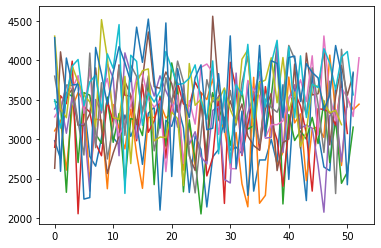

Test sensitivity 0.75
RAT 0 has 45 MC runs
RAT 10 has 46 MC runs
RAT 20 has 47 MC runs
RAT 30 has 47 MC runs
RAT 40 has 50 MC runs
RAT 50 has 48 MC runs
RAT 60 has 49 MC runs
RAT 70 has 49 MC runs
RAT 80 has 47 MC runs
RAT 90 has 51 MC runs
RAT 100 has 51 MC runs


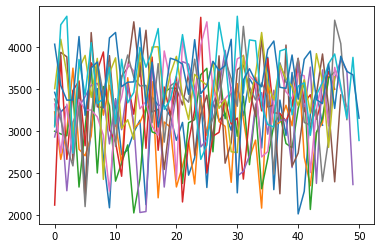

Test sensitivity 0.8
RAT 0 has 47 MC runs
RAT 10 has 46 MC runs
RAT 20 has 46 MC runs
RAT 30 has 44 MC runs
RAT 40 has 48 MC runs
RAT 50 has 49 MC runs
RAT 60 has 50 MC runs
RAT 70 has 49 MC runs
RAT 80 has 49 MC runs
RAT 90 has 50 MC runs
RAT 100 has 49 MC runs


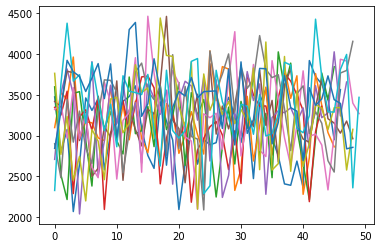

Test sensitivity 0.85
RAT 0 has 49 MC runs
RAT 10 has 46 MC runs
RAT 20 has 46 MC runs
RAT 30 has 48 MC runs
RAT 40 has 50 MC runs
RAT 50 has 47 MC runs
RAT 60 has 48 MC runs
RAT 70 has 50 MC runs
RAT 80 has 47 MC runs
RAT 90 has 48 MC runs
RAT 100 has 46 MC runs


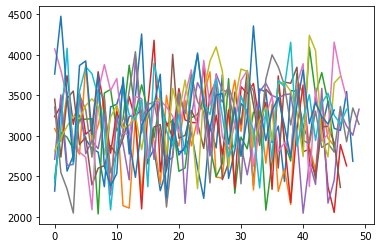

Test sensitivity 0.9
RAT 0 has 46 MC runs
RAT 10 has 46 MC runs
RAT 20 has 45 MC runs
RAT 30 has 49 MC runs
RAT 40 has 46 MC runs
RAT 50 has 49 MC runs
RAT 60 has 49 MC runs
RAT 70 has 47 MC runs
RAT 80 has 47 MC runs
RAT 90 has 46 MC runs
RAT 100 has 50 MC runs


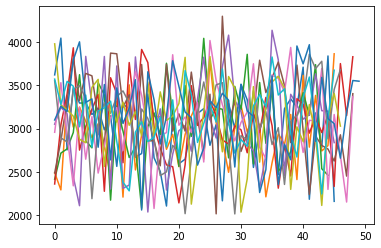

Test sensitivity 0.95
RAT 0 has 46 MC runs
RAT 10 has 46 MC runs
RAT 20 has 46 MC runs
RAT 30 has 46 MC runs
RAT 40 has 44 MC runs
RAT 50 has 47 MC runs
RAT 60 has 45 MC runs
RAT 70 has 47 MC runs
RAT 80 has 46 MC runs
RAT 90 has 46 MC runs
RAT 100 has 47 MC runs


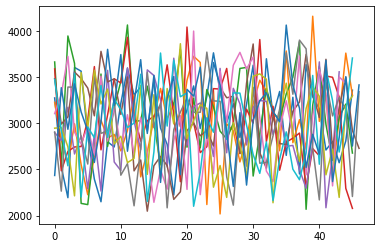

3174


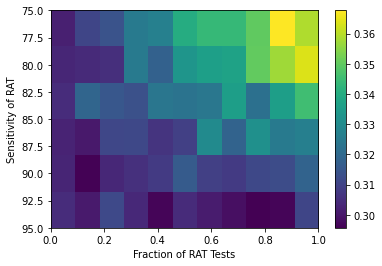

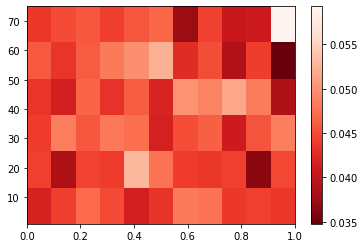

In [26]:
tss = [0.7,0.75,0.8,0.85,0.9,0.95]
# trs = [5]

results = np.zeros((len(tss),11))
std_ar = np.zeros((len(tss),11))


T_mc_count = 0
for i in range(0,len(tss)):
    print("Test sensitivity",tss[i])
    results[i],std_ar[i],mc_count = split_test_ratio(split_sensitivity(random_txt_files, tss[i]))
    T_mc_count += mc_count

print(T_mc_count)
# print(results)
# print(std_ar)

res_map = plt.imshow(results,aspect="auto",extent=[0,1,95,75])#,interpolation="bilinear")
plt.colorbar()
plt.xlabel("Fraction of RAT Tests")
plt.ylabel("Sensitivity of RAT")
plt.show()

std_map = plt.imshow(std_ar,aspect="auto",extent=[0,1,0.95,75])
std_map.set_cmap("Reds_r")
plt.colorbar()

plt.show()


In [7]:
igiig

NameError: name 'igiig' is not defined

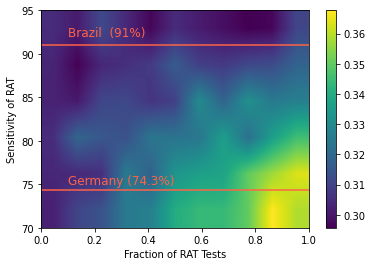

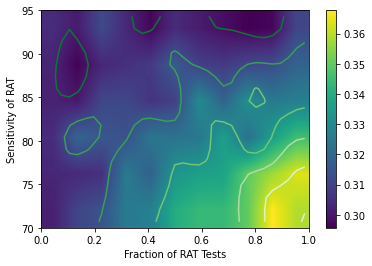

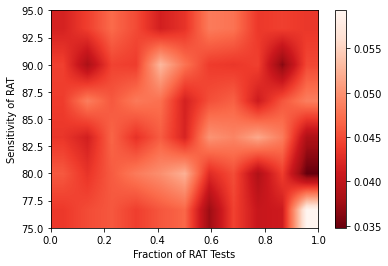

[[0.30197347 0.31063774 0.31412692 0.32507451 0.32700588 0.34014423
  0.34397736 0.34405882 0.350206   0.36769808 0.35913846]
 [0.30352667 0.30425    0.30548298 0.3253383  0.317982   0.33322917
  0.33635306 0.33728163 0.35027447 0.35738235 0.36388431]
 [0.30478511 0.31909565 0.31516522 0.31365909 0.3238375  0.32316939
  0.324126   0.33607755 0.32229592 0.336094   0.34570204]
 [0.30272857 0.3005     0.31102826 0.31142917 0.306528   0.30934255
  0.33004375 0.318606   0.3317     0.325      0.32668913]
 [0.30312609 0.29619348 0.30359556 0.30556735 0.30796087 0.31637347
  0.30922041 0.30782128 0.31125319 0.31231739 0.318684  ]
 [0.30473478 0.30092609 0.31171304 0.30401304 0.29679773 0.30452766
  0.30120444 0.29854468 0.29569565 0.29680435 0.31080638]]


In [35]:
import scipy.ndimage
import matplotlib.cm as cm


res_map = plt.imshow(results,aspect="auto",interpolation="bilinear",origin='lower',extent=[0,1,70,95])
plt.colorbar()
# res_map2 = plt.contour(results,20,extent=[0,1,75,95],origin = 'lower')
plt.xlabel("Fraction of RAT Tests")
plt.ylabel("Sensitivity of RAT")
plt.hlines(74.3,0,1,color='tomato')
plt.hlines(91,0,1,color='tomato')
plt.text(0.1,92,"Brazil  (91%)",color='tomato',fontsize=12)
plt.text(0.1,75,"Germany (74.3%)",color='tomato',fontsize=12)
plt.show()

smooth_data = scipy.ndimage.zoom(results,3)

smooth_map = plt.imshow(results,aspect="auto",interpolation="bilinear",origin='lower',extent=[0,1,70,95])
plt.colorbar()
smooth_map2 = plt.contour(smooth_data,5,extent=[0,1,70,95],origin = 'lower',cmap=cm.Greens_r)
plt.xlabel("Fraction of RAT Tests")
plt.ylabel("Sensitivity of RAT")

plt.show()




std_map = plt.imshow(std_ar,aspect="auto",interpolation="bilinear",origin='lower',extent=[0,1,75,95],alpha=1)
std_map.set_cmap("Reds_r")
plt.colorbar()
# std_map2 = plt.contour(std_ar,10,extent=[0,1,75,95],origin = 'lower')
plt.xlabel("Fraction of RAT Tests")
plt.ylabel("Sensitivity of RAT")

plt.show()
print(results)

In [15]:
?plt.text

In [ ]:
%matplotlib notebook

import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up grid and test data
# nx, ny = 1, 3
# x = range(nx)
# y = range(ny)

x = np.linspace(0,1,11)
y = np.array([0.7,0.75,0.8,0.85,0.9,0.95])

data = results

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)
# ha.contour3D(X,Y,data,200)



plt.ylabel("RAT Sensitivity")
plt.xlabel("Fraction of RAT tests (%)")


plt.show()

In [ ]:
for i in np.linspace(0,1,11):
    print(i)

In [ ]:
# def plot_graph(all_files,cc):
# #     print(all_files[0])
#     if cc[0] == 0:
#         if(cc[2] == 0):
#             clrs = plt.cm.Blues(np.linspace(0.5,1,6))
#         elif(cc[2] == 1):
#             clrs = plt.cm.Greens(np.linspace(0.5,1,6))
#     elif cc[0] == 1:
#         if(cc[2] == 0):
#             clrs = plt.cm.Reds(np.linspace(0.5,1,6))
#         elif(cc[2] == 1):
#             clrs = plt.cm.Oranges(np.linspace(0.5,1,6))
    
    
#     p_0_0 = []
#     p_0_2 = []
#     p_0_4 = []
#     p_0_6 = []
#     p_0_8 = []
#     p_0_9 = []
#     p_1_0 = []

#     p = [p_0_0, p_0_2, p_0_4, p_0_6, p_0_8, p_0_9, p_1_0]
#     x_axis = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0])
    
#     for i in range(0,len(all_files)):
#         if(all_files[i].split("_")[5]=="0.0"):
#             p_0_0.append(all_files[i])
#         elif(all_files[i].split("_")[5]=="0.2"):
#             p_0_2.append(all_files[i])
#         elif(all_files[i].split("_")[5]=="0.4"):
#             p_0_4.append(all_files[i])
#         elif(all_files[i].split("_")[5]=="0.6"):
#             p_0_6.append(all_files[i])
#         elif(all_files[i].split("_")[5]=="0.8"):
#             p_0_8.append(all_files[i])
#         elif(all_files[i].split("_")[5]=="0.9"):
#             p_0_9.append(all_files[i])
#         elif(all_files[i].split("_")[5]=="1.0"):
#             p_1_0.append(all_files[i])

    
#     data = [[],[],[],[],[],[],[]]
    
#     cools = ['blue','green','magenta','orange','orangered','maroon','red']

#     n_pop = 10000
    
#     print("*** Data ***")
    
#     for i in range(0,len(data)):
#         count = 0
#         temp_av = np.zeros(120,float)
#         for j in range(0, len(p[i])):
#             temp_data = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][4] # Get number of recovered from data
#             temp_data += np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][2]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][3]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][5] # DOING THIS BECAUSE I ONLY PLOTTED TILL 100 days, but infection completely dies out later
            
#             all_inf = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,2]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,3]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,5]
#             tx = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,0]
# #             plt.plot(tx, all_inf/n_pop,'--',alpha=0.2,color=cools[i])
#             if(len(temp_av)<len(all_inf)):
#                 for k in range(0,len(temp_av)):
#                     temp_av[k] += all_inf[k]
#             else:
#                 temp_av += all_inf
#             count += 1
#             data[i].append(temp_data)
#         print("RAT "+str(x_axis[i]*100)+"% "+str(data[i])+" "+ str(len(data[i]))+" runs")
# #         plt.yscale('log')
#         print(count)
# #         tx = np.linspace(0,120,120)
# #         temp_av = temp_av/(n_pop*count)
# #         plt.plot(tx,temp_av,color='red',label="Daily Testing: "+str(all_files[0].split("_")[2])+"% RAT sens:"+str(all_files[0].split("_")[4])+" RAT frac:"+str(round(x_axis[i]*100))+"%")
# #         plt.ylabel("Fraction of population")
# #         plt.xlabel("Days")
# #         plt.legend()
# #         plt.savefig("../images/Comparing_Sensitivities/Infected Graphs/"+all_files[i].split("_")[0].split("/")[-1]+"_"+"RAT_sens_"+str(all_files[i].split("_")[4])+"_frac"+str(x_axis[i]*100)+".png",facecolor='w')
# #         plt.show()


#     avgs = np.zeros(len(p),float)
#     stds = np.zeros(len(p),float)

    

#     for i in range(0,len(avgs)):
#         if(len(data[i])>0):
#             avgs[i] = np.average(data[i])/n_pop
#             stds[i] = np.std(data[i])/n_pop
#         else:
#             avgs[i] = np.nan
#             stds[i] = np.nan
    
#     if(len(all_files)!=0):
#         plt.title(all_files[0].split("_")[0].split("/")[-1]+" "+all_files[0].split("_")[1]+": RAT Sensitivity - "+all_files[0].split("_")[4])
    
#         plt.xlabel("Percentage of total tests that are RAT (%)")
#         plt.ylabel("Asymptotic Fraction Infected")
#         #plt.locator_params(nbins = len(labels),axis='x')
#     #     plt.xticks(fontsize=20)
#     #     plt.yticks(fontsize=20)

#     #     plt.plot(x_axis*100, avgs,'-o',color=clrs[0],label=all_files[0].split("_")[2]+"% "+ all_files[i].split("_")[0].split("/")[-1]+" Testing Daily")
#         plt.plot(x_axis*100, avgs,'-o',color=clrs[cc[1]],label=all_files[0].split("_")[2]+"% Testing Daily",alpha=1)#0.7*cc[1])
#         plt.errorbar(x_axis*100,avgs,yerr=stds,ls='none',color=clrs[cc[1]],solid_capstyle='projecting', capsize=5,alpha=0.5)
#     #     plt.legend()
#     #     plt.savefig("../images/Comparing_Sensitivities/"+all_files[i].split("_")[0].split("/")[-1]+"_"+all_files[i].split("_")[1]+all_files[i].split("_")[2]+"_BETA06_.png",dpi=500,facecolor='w')
#     #     plt.show()

In [ ]:
# plot_graph(random_txt_files,['dodgerblue','tomato'])
# plot_graph(targetted_txt_files,['lightseagreen','tomato'])

In [ ]:
# tss = [0.6,0.8]
# trs = [2,4,6,8]

# for i in range(0,len(tss)):
#     for j in range(0,len(trs)):
#         plot_graph(split_test_rate(split_sensitivity(targetted_txt_files,tss[i]),trs[j]),[i,j,1])
#     plt.legend()
# #     plt.savefig("../images/Comparing_Sensitivities/New_Increased_AFraction/Targetted_Testing_Sensitivity_"+str(tss[i])+".png",facecolor='w',dpi=500)
#     plt.show()

In [ ]:
# tss = [0.6, 0.8]
# trs = [0,2,4,6,8]

# for i in range(0,len(tss)):
#     for j in range(0,len(trs)):
#         plot_graph(split_test_rate(split_sensitivity(random_txt_files,tss[i]),trs[j]),[i,j,0])
#     plt.legend()
# #     plt.savefig("../images/Comparing_Sensitivities/New_Increased_AFraction/Random_Testing_Sensitivity_"+str(tss[i])+".png",facecolor='w',dpi=500)
#     plt.show()
